In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [18]:
df = pd.read_csv('Train-Set.csv')

In [19]:
df.head(5)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [21]:
df.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [22]:
df.shape

(8523, 12)

In [23]:
df['Weight'].mean()

12.857645184135976

In [24]:
df['Weight'].fillna(df['Weight'].mean(),inplace=True)

In [25]:
df.isnull().sum()

ProductID               0
Weight                  0
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [26]:
df['OutletSize'].mode()

0    Medium
Name: OutletSize, dtype: object

In [74]:
mode_data = df.pivot_table(values='OutletSize',columns='OutletType',aggfunc=(lambda x:x.mode()[0]))
print(mode)

OutletType Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
OutletSize         Small             Small            Medium            Medium


In [75]:
missing_values = df['OutletSize'].isnull()
print(missing_values)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: OutletSize, Length: 8523, dtype: bool


In [76]:
df.loc[missing_values,'OutletSize'] = df.loc[missing_values,'OutletType'].apply(lambda x:mode_data)

In [77]:
df.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [79]:
df.head(5)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,156,9.30,0,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,OutletType Grocery Store Supermarket Type1 Sup...,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,High,2,1,994.7052


In [33]:
df.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [34]:
sns.set()

C:\Users\Sreeja Mondal\AppData\Local\Temp\ipykernel_20324\4140539877.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

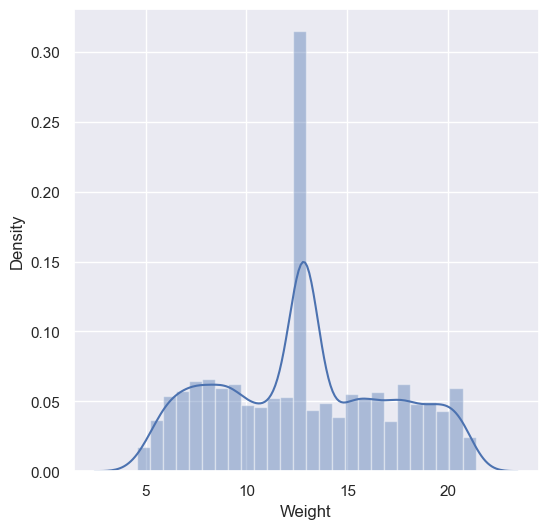

In [36]:
plt.figure(figsize=(6,6))
sns.distplot(df['Weight'])

C:\Users\Sreeja Mondal\AppData\Local\Temp\ipykernel_20324\2879610411.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ProductVisibility'])


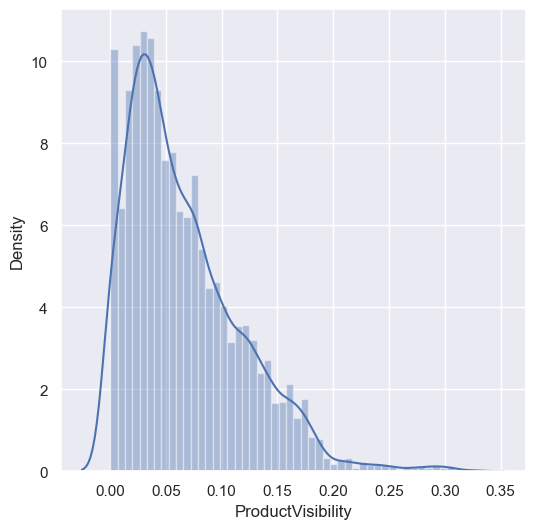

In [37]:
plt.figure(figsize=(6,6))
sns.distplot(df['ProductVisibility'])
plt.show()

C:\Users\Sreeja Mondal\AppData\Local\Temp\ipykernel_20324\540047864.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MRP'])


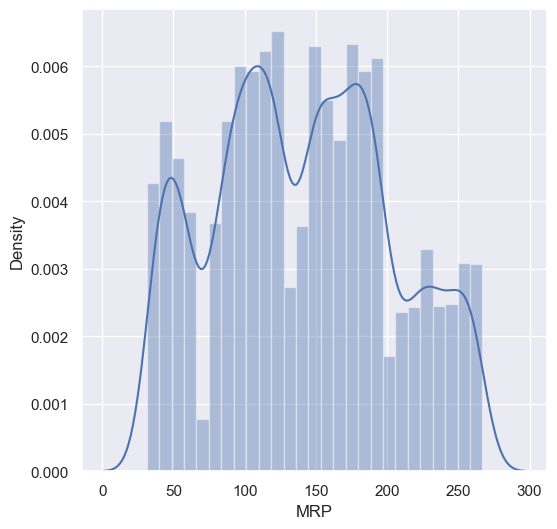

In [38]:
plt.figure(figsize=(6,6))
sns.distplot(df['MRP'])
plt.show()

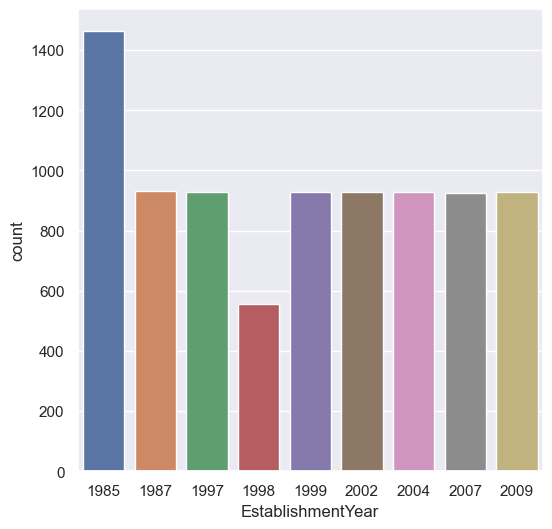

In [39]:
plt.figure(figsize=(6,6))
sns.countplot(x='EstablishmentYear',data=df)
plt.show()

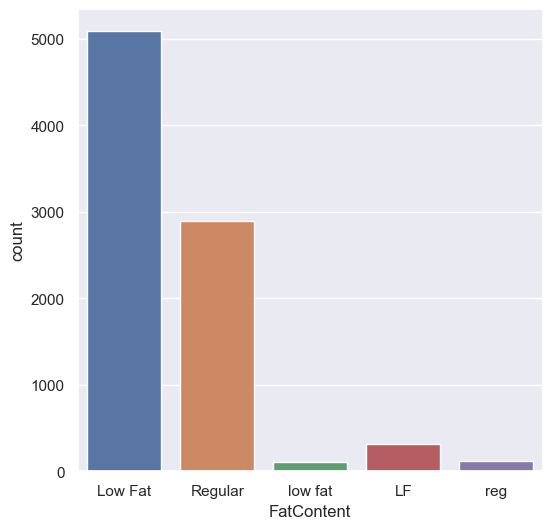

In [40]:
plt.figure(figsize=(6,6))
sns.countplot(x='FatContent',data=df)
plt.show()

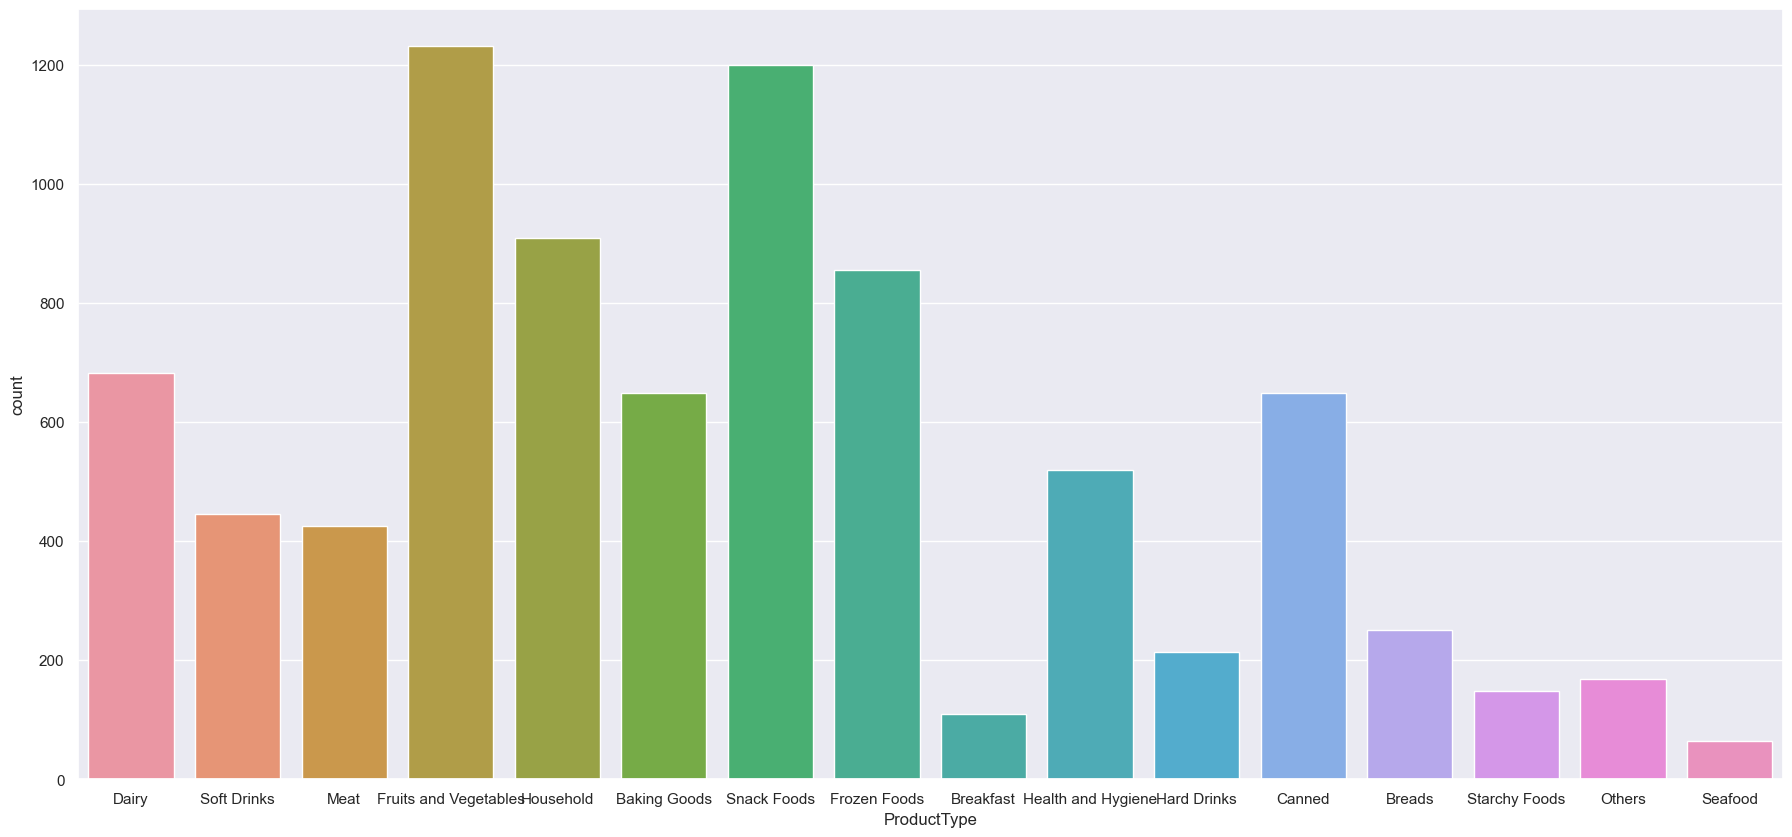

In [45]:
plt.figure(figsize=(22,10))
sns.countplot(x='ProductType',data=df)
plt.show()

In [48]:
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,OutletType Grocery Store Supermarket Type1 Sup...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [50]:
df['FatContent'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: FatContent, dtype: int64

In [52]:
df.replace({'FatContent':{'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'}},inplace=True)

In [53]:
df['FatContent'].value_counts()

Low Fat    5517
Regular    3006
Name: FatContent, dtype: int64

In [54]:
encoder = LabelEncoder()

In [55]:
df['ProductID'] = encoder.fit_transform(df['ProductID'])

In [56]:
df['FatContent'] = encoder.fit_transform(df['FatContent'])

In [57]:
df['ProductType'] = encoder.fit_transform(df['ProductType'])

In [58]:
df['OutletID'] = encoder.fit_transform(df['OutletID'])

In [61]:
df['OutletType'] = encoder.fit_transform(df['OutletType'])

In [62]:
df['LocationType'] = encoder.fit_transform(df['LocationType'])

In [80]:
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,156,9.30,0,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,OutletType Grocery Store Supermarket Type1 Sup...,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,High,2,1,994.7052


In [88]:
df.drop('OutletSize',axis=1,inplace=True)

In [89]:
X = df.drop(columns='OutletSales',axis=1)
Y = df['OutletSales']

In [90]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [91]:
print(X)

      ProductID  Weight  FatContent  ProductVisibility  ProductType       MRP  \
0           156   9.300           0           0.016047            4  249.8092   
1             8   5.920           1           0.019278           14   48.2692   
2           662  17.500           0           0.016760           10  141.6180   
3          1121  19.200           1           0.000000            6  182.0950   
4          1297   8.930           0           0.000000            9   53.8614   
...         ...     ...         ...                ...          ...       ...   
8518        370   6.865           0           0.056783           13  214.5218   
8519        897   8.380           1           0.046982            0  108.1570   
8520       1357  10.600           0           0.035186            8   85.1224   
8521        681   7.210           1           0.145221           13  103.1332   
8522         50  14.800           0           0.044878           14   75.4670   

      OutletID  Establishme

In [92]:
regressor = XGBRegressor()

In [93]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [96]:
train_data_prediction = regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train,train_data_prediction)
print(r2_train)

0.874185623422072


In [97]:
test_data_prediction = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print(r2_test)

0.4934005358588578
